In [1]:
import numpy as np
import sys
from pathlib import Path
sys.path.insert(0, str(Path().resolve().parent))

G

/var/folders/l5/rhh7z5c528b5hjwqy30m3vzr0000gn/T/ipykernel_32475/2958438221.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  approx_trapz = np.trapz(integrand, x)


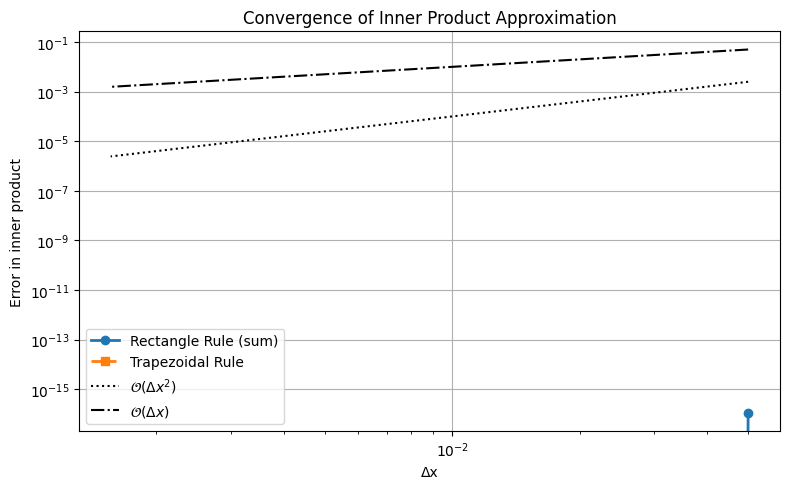

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and basis to project onto
def u(x):
    return np.sin(np.pi * x)

def phi_n(x, n):
    return np.sin(n * np.pi * x)

# Exact value of the inner product <u, phi_n>
def exact_inner_product(n):
    if n == 1:
        return 0.5
    else:
        return 0.0

# Define values of N (number of segments)
Ns = [20, 40, 80, 160, 320, 640]
errors_sum = []
errors_trapz = []
dx_vals = []

n = 1  # mode to project onto

for N in Ns:
    x = np.linspace(0, 1, N + 1)
    dx = x[1] - x[0]
    dx_vals.append(dx)

    integrand = u(x) * phi_n(x, n)

    # Rectangle rule approximation
    approx_sum = np.sum(integrand) * dx

    # Trapezoidal rule approximation
    approx_trapz = np.trapz(integrand, x)

    # Exact result
    exact = exact_inner_product(n)

    # Errors
    errors_sum.append(abs(approx_sum - exact))
    errors_trapz.append(abs(approx_trapz - exact))

# Plotting error vs dx
plt.figure(figsize=(8, 5))
plt.loglog(dx_vals, errors_sum, 'o-', label='Rectangle Rule (sum)', linewidth=2)
plt.loglog(dx_vals, errors_trapz, 's--', label='Trapezoidal Rule', linewidth=2)
plt.loglog(dx_vals, [dx**2 for dx in dx_vals], 'k:', label=r'$\mathcal{O}(\Delta x^2)$')
plt.loglog(dx_vals, [dx for dx in dx_vals], 'k-.', label=r'$\mathcal{O}(\Delta x)$')

plt.xlabel('Δx')
plt.ylabel('Error in inner product')
plt.title('Convergence of Inner Product Approximation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
